In [1]:
!pip install sunpy
!pip install pfsspy
!pip install streamtracer
!pip install zeep
!pip install drms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 4.0 MB/s eta 0:00:0022.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 56.6 MB/s eta 0:00:00m eta 0:00:01:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 36.4 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.7/240.7 kB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.3/304.3 kB 48.9 MB/s eta 0:00:00
  Attempting uninstall: astropy
    Found existing installation: astropy 5.1
    Uninstalling astropy-5.1:
      Successfully uninstalled astropy-5.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.8 MB/s eta 0:00:0013.4 MB/s eta 0:00:01
  Using cached numpy-1.24.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 kB 66.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 19.6 MB/s eta 0:00:00m eta 0:00:010:00:01
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=391325bcc83f08a39bf73ee516628b4bed6bb1970bbd344c7145cb58d2bdd55b
  Stored in directory: /home/iiserb/.cache/pip/wheels/07/00/bc/937e878be0d781a569792a1e0e5acf149e463d4536453ec978
Successfully built asciitree
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.4 which is incompatible.

In [4]:
#import necessary packages
import os
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import sunpy.map
from astropy.coordinates import SkyCoord
import pfsspy
import pfsspy.tracing as tracing
from pfsspy.sample_data import get_gong_map

In [5]:
#Download magnetic field Data
gong_fname = get_gong_map()
gong_map = sunpy.map.Map(gong_fname)

#Get corresponding AIA map
if not os.path.exists('aia_map.fits'):
    import urllib.request
    urllib.request.urlretrieve(
        'http://jsoc2.stanford.edu/data/aia/synoptic/2020/09/01/H1300/AIA20200901_1300_0193.fits',
        'aia_map.fits')

aia = sunpy.map.Map('aia_map.fits')
dtime = aia.date
gong_map.meta['cunit1'] = 'degree'
gong_map.meta['cunit2'] = 'degree'

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

pfsspy.mrzqs200901t1304c2234_022.fits.gz:   0%|          | 0.00/242k [00:00<?, ?B/s]

In [6]:
from sunpy.net import Fido, attrs as a
results = Fido.search(a.Time("2019/12/31 22:00", "2020/1/1 02:00"),
                      a.Instrument('GONG'))

res = Fido.search(a.Time('2014-01-01T00:00:00', '2014-01-01T01:00:00'),
                  a.jsoc.Series('hmi.v_45s'))

In [7]:
print(res)

Results from 1 Provider:

81 Results from the JSOCClient:
Source: http://jsoc.stanford.edu

         T_REC          TELESCOP  INSTRUME  WAVELNTH CAR_ROT
----------------------- -------- ---------- -------- -------
2014.01.01_00:00:45_TAI  SDO/HMI HMI_FRONT2   6173.0    2145
2014.01.01_00:01:30_TAI  SDO/HMI HMI_FRONT2   6173.0    2145
2014.01.01_00:02:15_TAI  SDO/HMI HMI_FRONT2   6173.0    2145
2014.01.01_00:03:00_TAI  SDO/HMI HMI_FRONT2   6173.0    2145
2014.01.01_00:03:45_TAI  SDO/HMI HMI_FRONT2   6173.0    2145
2014.01.01_00:04:30_TAI  SDO/HMI HMI_FRONT2   6173.0    2145
2014.01.01_00:05:15_TAI  SDO/HMI HMI_FRONT2   6173.0    2145
                    ...      ...        ...      ...     ...
2014.01.01_00:56:15_TAI  SDO/HMI HMI_FRONT2   6173.0    2145
2014.01.01_00:57:00_TAI  SDO/HMI HMI_FRONT2   6173.0    2145
2014.01.01_00:57:45_TAI  SDO/HMI HMI_FRONT2   6173.0    2145
2014.01.01_00:58:30_TAI  SDO/HMI HMI_FRONT2   6173.0    2145
2014.01.01_00:59:15_TAI  SDO/HMI HMI_FRONT2   6173.0  

In [8]:
#PFSS works on 3D grid(phi, s, rho), so we have to define number of points in one face of grid(nrho), and surface radius (ie: s limit)

nrho = 25
rss = 2.5

pfss_in = pfsspy.Input(gong_map, nrho, rss)

2024-03-14 18:04:23 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


Text(0.5, 1.0, 'Input field')

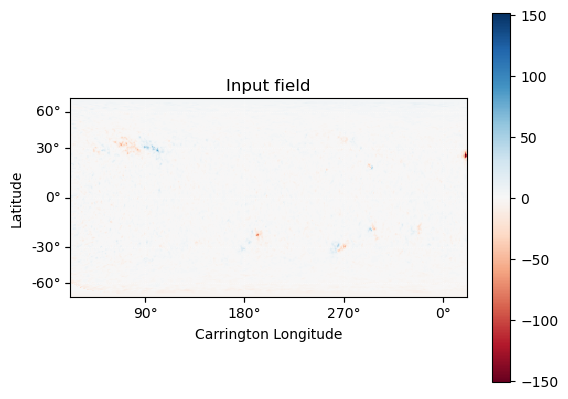

In [9]:
#Plot the downloaded data
m = pfss_in.map
fig = plt.figure()
ax = plt.subplot(projection=m)
m.plot()
plt.colorbar()
ax.set_title('Input field')

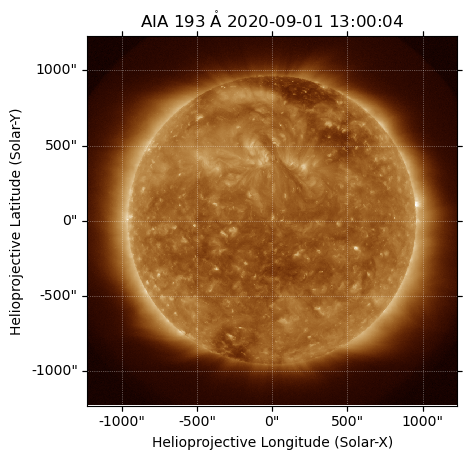

In [10]:
#Plot AIA data

ax = plt.subplot(1,1,1, projection=aia)
aia.plot(axes=ax)

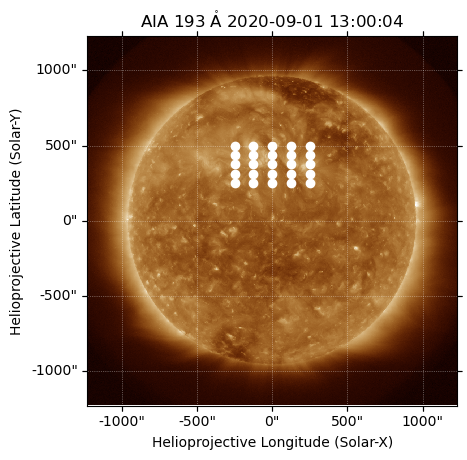

In [11]:
#Lets define the patch where pfss has to be performed

hp_lon = np.linspace(-250, 250, 5) * u.arcsec
hp_lat = np.linspace(250, 500, 5) * u.arcsec
# Make a 2D grid from these 1D points
lon, lat = np.meshgrid(hp_lon, hp_lat)
seeds = SkyCoord(lon.ravel(), lat.ravel(),
                 frame=aia.coordinate_frame)

fig = plt.figure()
ax = plt.subplot(projection=aia)
aia.plot(axes=ax)
ax.plot_coord(seeds, color='white', marker='o', linewidth=0)

(0.0, 179.5)

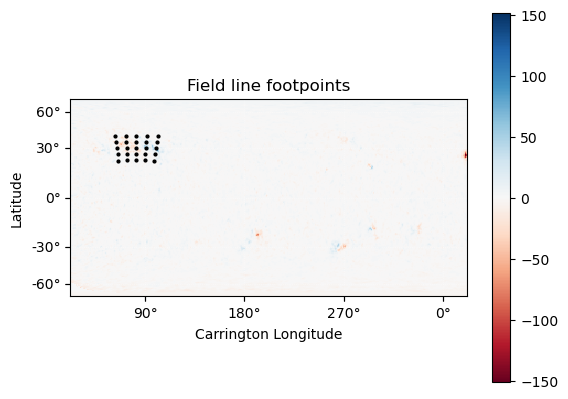

In [12]:
#Where will this be in the magnetic field data?
m = pfss_in.map
fig = plt.figure()
ax = plt.subplot(projection=m)
m.plot()
plt.colorbar()

ax.plot_coord(seeds, color='black', marker='o', linewidth=0, markersize=2)

# Set the axes limits. These limits have to be in pixel values
# ax.set_xlim(0, 180)
# ax.set_ylim(45, 135)
ax.set_title('Field line footpoints')
ax.set_ylim(bottom=0)

In [13]:
#!pip install astropy


In [14]:
#Perform PFSS and trace field lines from tracers
pfss_out = pfsspy.pfss(pfss_in)
print, pfss_out
tracer = tracing.FortranTracer()
flines = tracer.trace(seeds, pfss_out)

/home/iiserb/anaconda3/lib/python3.9/site-packages/pfsspy/output.py:95: UserWarning: Could not parse unit string "Gauss" as a valid FITS unit.
See https://fits.gsfc.nasa.gov/fits_standard.html for the FITS unit standards.
  warnings.warn(f'Could not parse unit string "{unit_str}" as a valid FITS unit.\n'
/home/iiserb/anaconda3/lib/python3.9/site-packages/pfsspy/tracing.py:180: UserWarning: At least one field line ran out of steps during tracing.
You should probably increase max_steps (currently set to auto) and try again.
  warnings.warn(


Text(0.5, 1.0, 'Photospheric field and traced field lines')

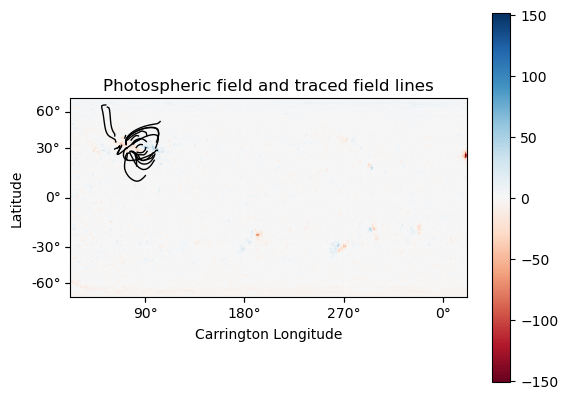

In [15]:
#Plot it over magnetic data

m = pfss_in.map
fig = plt.figure()
ax = plt.subplot(projection=m)
m.plot()
plt.colorbar()

for fline in flines:
    ax.plot_coord(fline.coords, color='black', linewidth=1)

# Set the axes limits. These limits have to be in pixel values
# ax.set_xlim(0, 180)
# ax.set_ylim(45, 135)
ax.set_title('Photospheric field and traced field lines')

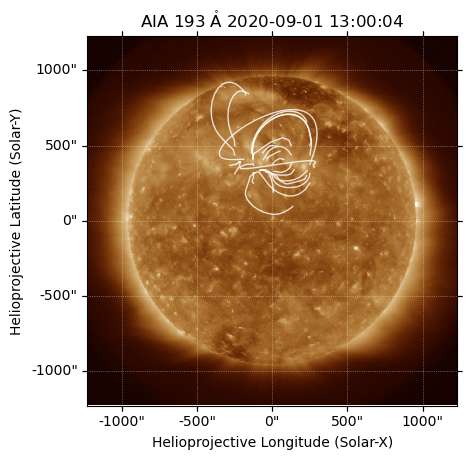

In [16]:
#Plot it over AIA

fig = plt.figure()
ax = plt.subplot(1, 1, 1, projection=aia)
aia.plot(axes=ax)
for fline in flines:
    ax.plot_coord(fline.coords, alpha=0.8, linewidth=1, color='white')

#ax.set_xlim(300, 700)
#ax.set_ylim(400, 800)
plt.show()